# Problem Statement

Our client is an Insurance company which has provided Health Insurance to its customers. Now, it wants to know whether its customers need Vehicle Insurance or not, so we have to build a model to predict whoever will be interested in Vehicle Insurance provided by the company.

# Data Description

This dataset contains information about customers who all are buying Health Insurance.Our aim is to find that which customer is ready to take Vehicle Insurance also.

**Id:**Unique ID for customers

**Gender:** Gender of the customer

**Age:**Age of the customer

**Driving_License:**0: Customer does not have DL. 1: Customer already has DL

**Region_Code:**Unique code for region of the customer

**Previously_Insured:**0: Customer does not have Vehicle Insurance. 1:Customer already has Vehicle       Insurance

**Vehicle_Age**: Age of the Vehicle

**Vehicle_Damage**: 0: Customer didn’t get his/her damaged vehicle in the past. 1: Customer got his/her vehicle damaged in the past

**Annual_Premium**: The amount needs to pay as premium in the year

**PolicySalesChannel**: Anonymized Code for the channel of outreaching to the customer, i.e. Different Agents, Over Mail, Over Phone, In person, etc.

**Vintage**: Number of Days customer has been associated with the company

**Response**: 0:Customer is not interested. 1: Customer is interested



# Import Libraries & Dataset

In [1]:
#import numpy
import numpy as np

#import pandas
import pandas as pd

#import subpackage of matplotlib
import matplotlib.pyplot as plt

#import seaborn
import seaborn as sns 

#import warnings
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

#import standard scalar to perform scaling
from sklearn.preprocessing import StandardScaler

#import logistic regression algorithm
from sklearn.linear_model import LogisticRegression

#import various function from sklearn library
from sklearn.linear_model import Lasso,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score
from sklearn.metrics import cohen_kappa_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

#import various function from statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import smote for balancing data
from imblearn.over_sampling import SMOTE

#import counter to count the values based on each category
from collections import Counter

#Ensemble techniques
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [2]:
df_health= pd.read_csv('C:/Users/Sharon/OneDrive/Documents/train.csv')
df_health.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Exploratory Data Analysis(EDA)

In [3]:
df_health.shape

(381109, 12)

## Checking Data types 

In [4]:
df_health.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Data type Conversion

In [5]:
df_health['Driving_License']=df_health['Driving_License'].astype('object')
df_health['Previously_Insured']=df_health['Previously_Insured'].astype('object')
df_health.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License          object
Region_Code             float64
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Checking for Null /Missing Values & Duplicates

In [6]:
df_health.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values

In [7]:
df_health.duplicated().value_counts()

False    381109
dtype: int64

There are no duplicates

## Understanding the data

In [8]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 34.9+ MB


## Describing the numerical columns of the data

In [9]:
numerical_columns=['Age','Annual_Premium','Vintage']

In [10]:
df_health[numerical_columns].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


# Univariate Analysis

## Target Variable: Response

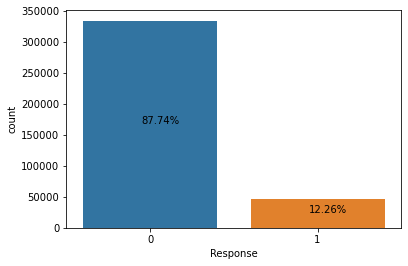

In [11]:
sns.countplot(df_health['Response']);
pct_0=str(round(df_health['Response'].value_counts()[0]*100/len(df_health),2)) + str('%')
pct_1=str(round(df_health['Response'].value_counts()[1]*100/len(df_health),2)) + str('%')
plt.text(x=-0.05,y=df_health['Response'].value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=df_health['Response'].value_counts()[1]/2,s=pct_1)
plt.show()


Inference:
Number of people who are NOT interested: 334399 and its percentage is 87.7
4%
Number of people who are interested: 46710 and its percentage is 12.26%

## Age Dist.

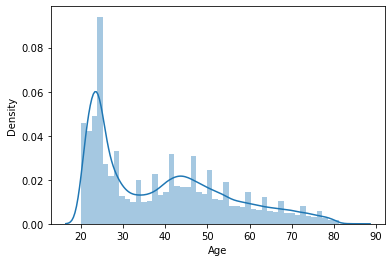

In [12]:
sns.distplot(df_health.Age);
plt.show()

Inference: The Age feature is right skewed.

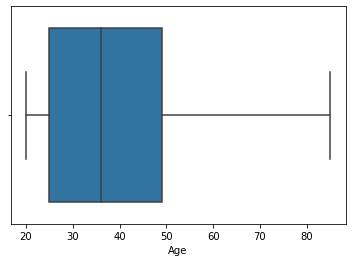

In [13]:
sns.boxplot(df_health.Age)
plt.show()

Inference:The middle 50% Age values lies between 25 to 49

## Customers Having Vehicle Insurance already

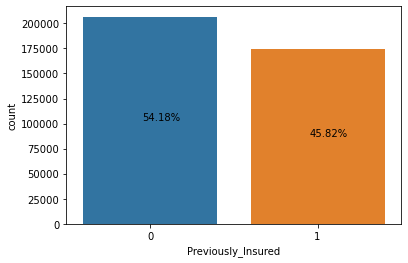

In [14]:
sns.countplot(df_health['Previously_Insured'])
pct_0=str(round(df_health['Previously_Insured'].value_counts()[0]*100/len(df_health),2)) + str('%')
pct_1=str(round(df_health['Previously_Insured'].value_counts()[1]*100/len(df_health),2)) + str('%')
plt.text(x=-0.05,y=df_health['Previously_Insured'].value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=df_health['Previously_Insured'].value_counts()[1]/2,s=pct_1)
plt.show()

In [15]:
df_health['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

Inference: 206481 customers who account to 45.82% of the data who already have vehicle insurance and 174628 customers who make upto 54.18% of data does not have Vehicle Insurance, which is significant for us.

## Vehicle Age

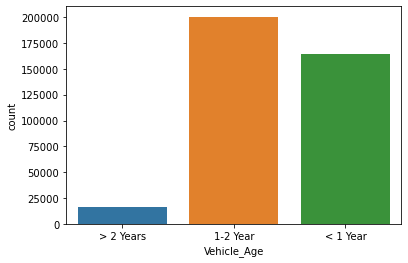

In [16]:
sns.countplot(df_health.Vehicle_Age)
plt.show()

Inference: Majority of customers present in he data have vehice which is 1 to 2 years of age, followed by people with less than a year of
vehicle age and very few have vehicle which are more than 2 years of age. This implies the majority of the peolpe in the 
dataset have new vehicles.

## Customers having damaged vehicle

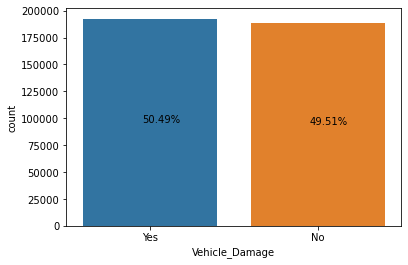

In [17]:
sns.countplot(df_health['Vehicle_Damage'])
pct_0=str(round(df_health['Vehicle_Damage'].value_counts()[0]*100/len(df_health),2)) + str('%')
pct_1=str(round(df_health['Vehicle_Damage'].value_counts()[1]*100/len(df_health),2)) + str('%')
plt.text(x=-0.05,y=df_health['Vehicle_Damage'].value_counts()[0]/2,s=pct_0)
plt.text(x=0.95,y=df_health['Vehicle_Damage'].value_counts()[1]/2,s=pct_1)
plt.show()

 Inference: The dataset contains almost equal number of people with damaged vehicle as compared to non damaged vehicle.

# Bi-Variate Analysis

## Age vs Annual Premium

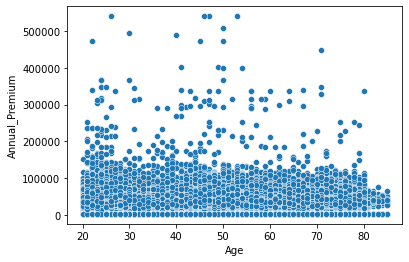

In [18]:
sns.scatterplot(x=df_health['Age'],y=df_health['Annual_Premium'])
plt.show()

Inference: There is no significant relationship between Age and Annual Premium

## Gender & Response

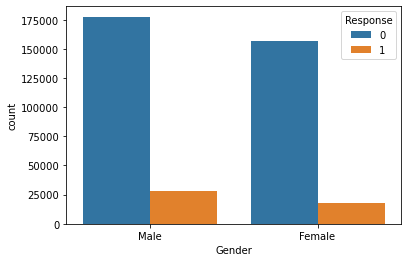

In [19]:
sns.countplot(df_health['Gender'],hue=df_health['Response'])
plt.show()

Inference: The number of Males, who have not insured their vehicle till now is more than females and same pattern is observed when
we comapre the males and females who have already insured.

## Driving License By Gender

In [20]:
b=df_health.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
b

,Gender,Driving_License
0,Female,175020
1,Male,206089


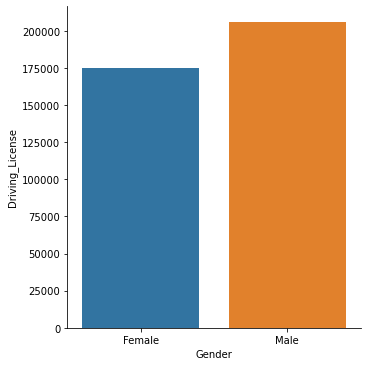

In [21]:
sns.catplot(x="Gender", y="Driving_License", data=b, kind="bar");

Inference: Number of Males having driving Licences is more as compared to those of Females.

## Customers Having Vehicle Insurance already vs Gender

In [22]:
df_plot = df_health.groupby(['Previously_Insured', 'Gender']).size().reset_index().pivot(columns='Gender', index='Previously_Insured', values=0)
df_plot

Gender,Female,Male
Previously_Insured,,
0,87071,119410
1,87949,86679


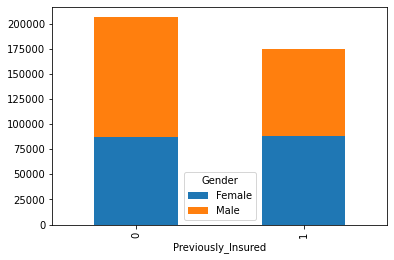

In [23]:
df_plot.plot(kind='bar',stacked=True)
plt.show()

Inference: The number of females who have previously taken and not taken insurance is almost same and the number of males who have previously not taken insurance is significantly more, which becomes the potential customer base for cross-selling
vehicle insurance.

## Age vs Vehicle_Damage

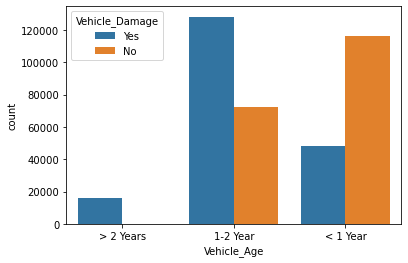

In [24]:
sns.countplot(df_health['Vehicle_Age'],hue=df_health['Vehicle_Damage'])
plt.show()

Inference: The majority of vehicles which are less than 1 year are not damaged

The vehicles which has >2 years age are almost damaged vehicles

The majority of vehicles which has 1-2 years of age are damaged vehicles.

# Multi-Variate Analysis

## Annual Premium

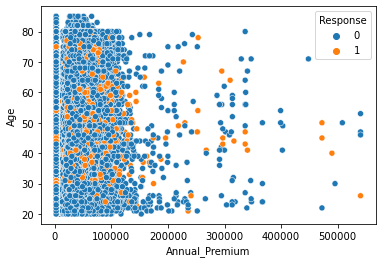

In [25]:
sns.scatterplot(x='Annual_Premium',y='Age',hue='Response',data=df_health)
plt.show()

Inference: Most of the people have annual premium less than 1.5 lakhs

Majority of people interested in vehicle insurance also have annual premium less than 1.5 lakhs.

# Data Preparation

## Drop the redundant feature

In [26]:
df_health=df_health.drop('id',axis=1)

Inference: Now, the column ‘Id’ has dropped

## Treating Outliers

<AxesSubplot:>

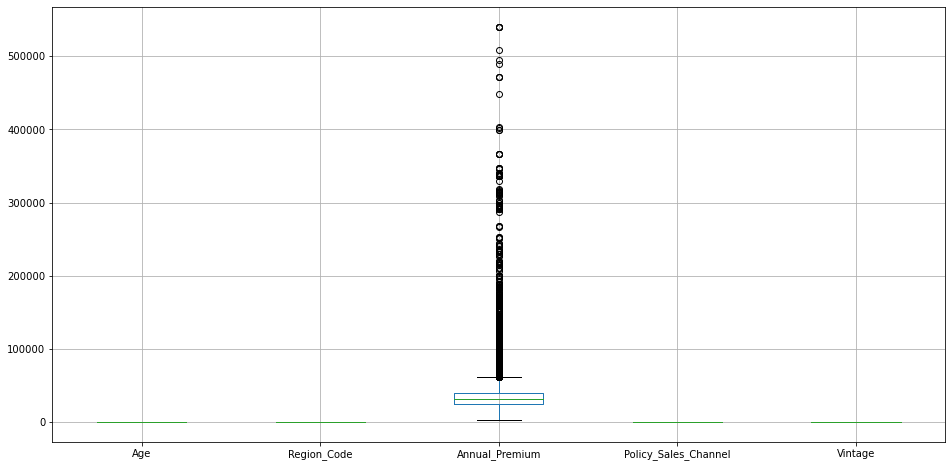

In [27]:
df_num=df_health.select_dtypes('number').drop('Response',axis=1)
df_num.boxplot(figsize=(16,8))

In [28]:
Q1 = df_health['Annual_Premium'].quantile(0.25)

Q3 = df_health['Annual_Premium'].quantile(0.75)

IQR = Q3 - Q1

df_health = df_health[~((df_health['Annual_Premium'] < (Q1 - 1.5 * IQR)) | 
                        (df_health['Annual_Premium'] > (Q3 + 1.5 * IQR)))].reset_index()

# check the shape of the data
df_health.shape

(370789, 12)

<AxesSubplot:xlabel='Annual_Premium'>

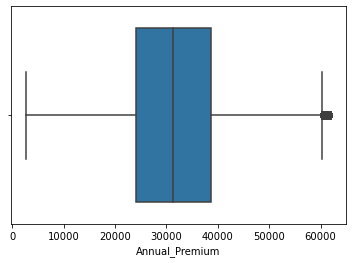

In [29]:
sns.boxplot(df_health['Annual_Premium'])

Inference: We have treated the outliers using IQR method

# Basic Model

In [33]:
#scaling the data & splitting train and test data
num=df_health.select_dtypes('number').drop('Response',axis=1)
cat=df_health.select_dtypes('object')
encode=pd.get_dummies(cat,drop_first=True)
SS=StandardScaler().fit_transform(num)
df_scale=pd.DataFrame(data=SS,columns=num.columns)

X=pd.concat([df_scale,encode],axis=1)
y=df_health['Response']

Xs_train,Xs_test,ys_train,ys_test=train_test_split(X,y,random_state=10,test_size=0.2)

print('X_train:',Xs_train.shape)
print('X_test:',Xs_test.shape)
print('y_train:',ys_train.shape)
print('y_test:',ys_test.shape)

X_train: (296631, 12)
X_test: (74158, 12)
y_train: (296631,)
y_test: (74158,)


In [34]:
#splitting train and test data for normal data
df_num=df_health.select_dtypes('number').drop('Response',axis=1)
df_cat=df_health.select_dtypes('object')
encoding=pd.get_dummies(df_cat,drop_first=True)
X=pd.concat([df_num,encoding],axis=1)
y=df_health['Response']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (296631, 12)
X_test: (74158, 12)
y_train: (296631,)
y_test: (74158,)


## Logistic Regression model from Sklearn library

In [35]:
log_reg=LogisticRegression()
#model_full=log_reg.fit(X_train,y_train)
model_full=log_reg.fit(X_train,y_train)

y_pred_prob=model_full.predict(X_test)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [36]:
classifi_report=classification_report(y_test,y_pred)
print(classifi_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65118
           1       0.00      0.00      0.00      9040

    accuracy                           0.88     74158
   macro avg       0.44      0.50      0.47     74158
weighted avg       0.77      0.88      0.82     74158



In [37]:
log_reg=LogisticRegression()
model_full=log_reg.fit(X_train,y_train)

y_pred_prob=model_full.predict(X_test)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [38]:
classifi_report=classification_report(y_test,y_pred)
print(classifi_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65118
           1       0.00      0.00      0.00      9040

    accuracy                           0.88     74158
   macro avg       0.44      0.50      0.47     74158
weighted avg       0.77      0.88      0.82     74158



Interpretation: Accuracy score has been around 88%. But, Precision score, Recall score and F1Score for Target 0 is very higher than Target 1 means it a highly imbalanced data.

## Confusion matrix

<AxesSubplot:>

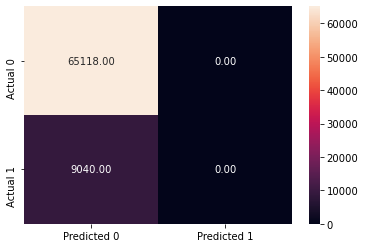

In [40]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],fmt='.2f')

Interpretation: Here, True Negative values are very higher than True Positive values and also False Negative values are higher than False Postitve values. 

## Handling imbalanced data

### Percentage of imbalanced data

In [41]:
per_0=str(round(df_health['Response'].value_counts()[0]/df_health['Response'].count(),2)*100) + str('%')
per_1=str(round(df_health['Response'].value_counts()[1]/df_health['Response'].count(),2)*100) + str('%')

print('Percent for Target Variable 0:',per_0)
print('Percent for Target Variable 1:',per_1)

Percent for Target Variable 0: 88.0%
Percent for Target Variable 1: 12.0%


This dataset has been highly imbalanced.So, treating imbalanced dataset by using SMOTE technique to make a balanced dataset.

In [42]:
smt = SMOTE(random_state=42,sampling_strategy=0.8)
X_res, y_res = smt.fit_resample(X, y)

print('Imbalanced data(Response):',Counter(y))
print('Balanced data by using SMOTE:',Counter(y_res))

Imbalanced data(Response): Counter({0: 325634, 1: 45155})
Balanced data by using SMOTE: Counter({0: 325634, 1: 260507})


### Percentage of balanced data

In [43]:
per_0=str(round(y_res.value_counts()[0]/df_health['Response'].count(),2)*100) + str('%')
per_1=str(round(y_res.value_counts()[1]/df_health['Response'].count(),2)*100) + str('%')

print('Percent for Target Variable 0:',per_0)
print('Percent for Target Variable 1:',per_1)

Percent for Target Variable 0: 88.0%
Percent for Target Variable 1: 70.0%


In [44]:
#splitting train and test data after balancing data
X1_train,X1_test,y1_train,y1_test=train_test_split(X_res,y_res,random_state=10,test_size=0.2)

print('X_train:',X1_train.shape)
print('X_test:',X1_test.shape)
print('y_train:',y1_train.shape)
print('y_test:',y1_test.shape)

X_train: (468912, 12)
X_test: (117229, 12)
y_train: (468912,)
y_test: (117229,)


## Model after balancing data

In [45]:
log_reg=LogisticRegression()
model_full=log_reg.fit(X1_train,y1_train)

In [46]:
y_pred_prob=model_full.predict_proba(X1_test)[:,:1]
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]
classifi_report=classification_report(y1_test,y_pred)
print(classifi_report)

              precision    recall  f1-score   support

           0       0.46      0.26      0.34     65061
           1       0.40      0.61      0.48     52168

    accuracy                           0.42    117229
   macro avg       0.43      0.44      0.41    117229
weighted avg       0.43      0.42      0.40    117229



In [47]:
print('F1Score for the balanced data:', f1_score(y1_test,y_pred))

F1Score for the balanced data: 0.4815031315240083


Interpretation: Now, the Target variable seems to be balanced. And also here, Accuracy is not a correct evaluation metric because our dataset is highly imbalanced, so we are picking F1Score as evaluation metric because it is a harmonium mean of Precision and Recall.

## Finding Optimal Threshold

In [48]:
#finding optimal threshold by using Youden's Index
y_pred_prob=model_full.predict_proba(X1_test)[:,:1]
#y_pred_prob=list(y_pred_prob)
fpr,tpr,threshold=roc_curve(y1_test,y_pred_prob)
youden_table=pd.DataFrame()
youden_table['TPR']=tpr
youden_table['FPR']=fpr
youden_table['Threshold']=threshold
youden_table['Difference']=youden_table['TPR']-youden_table['FPR']
youden_table.sort_values('Difference',ascending=False).reset_index(drop=True).head(10)

,TPR,FPR,Threshold,Difference
0,0.958921,0.913266,0.376974,0.045655
1,0.958806,0.913158,0.377042,0.045648
2,0.958960,0.913312,0.376957,0.045647
3,0.958864,0.913220,0.377002,0.045644
4,0.958940,0.913297,0.376969,0.045644
5,0.958768,0.913128,0.377055,0.045640
6,0.958883,0.913251,0.376991,0.045632
7,0.958020,0.912390,0.377445,0.045630
8,0.958940,0.913312,0.376964,0.045628
9,0.958921,0.913297,0.376970,0.045624


Youden's index comes with the optimum threshold as 0.4.

## Re-fitting the model with the Optimal Threshold Value

In [49]:
#re=fitting the model with optimal threshold value which is 0.6
y1_pred_prob=model_full.predict_proba(X1_test)[:,:1]
y1_pred=[0 if x<0.4 else 1 for x in y1_pred_prob]

classi_report=classification_report(y1_test,y1_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.62      0.14      0.23     65061
           1       0.45      0.89      0.60     52168

    accuracy                           0.47    117229
   macro avg       0.54      0.52      0.41    117229
weighted avg       0.55      0.47      0.39    117229



In [50]:
print('F1Score for the re-fitted model:',f1_score(y1_test,y1_pred))

F1Score for the re-fitted model: 0.6026219476772331


Interpretation: After re-fitting the model with optimal threshold value, there is increase in F1Score.

# Ensemble Techniques

## Random Forest

In [51]:
#renaming columns names
X1_train=X1_train.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_less_than_1 yr',
                                  'Vehicle_Age_> 2 Years':'Vehicle_less_than_2 yr'})

In [52]:
rf_model=RandomForestClassifier(n_estimators=40,random_state=10)
rf_model=rf_model.fit(X1_train,y1_train)

<AxesSubplot:>

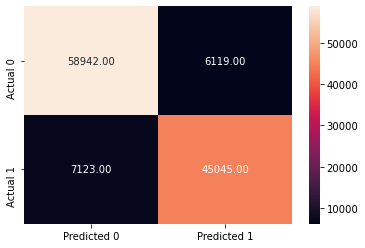

In [53]:
y_pred_r=rf_model.predict(X1_test)
cm=confusion_matrix(y1_test,y_pred_r)

TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

sns.heatmap(cm,xticklabels=['Predicted 0','Predicted 1'],annot=True,yticklabels=['Actual 0','Actual 1'],fmt='.2f')

Here, Clearly shows that the values of True Predictions are greater than False Predictions.

In [54]:
y_pred=rf_model.predict(X1_test)
classi_report=classification_report(y1_test,y_pred_r)
print(classi_report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     65061
           1       0.88      0.86      0.87     52168

    accuracy                           0.89    117229
   macro avg       0.89      0.88      0.89    117229
weighted avg       0.89      0.89      0.89    117229



In [55]:
print('F1Score for Random Forest model:',f1_score(y1_test,y_pred_r))

F1Score for Random Forest model: 0.8718499593543143


F1Score for Random Forest Model is around 87%. It clearly shows that, by using ensemble technique, accuracy score has been increased.

## Gradient Boosting

In [56]:
gb_model=GradientBoostingClassifier(n_estimators=40,random_state=10)
gb_model=gb_model.fit(X1_train,y1_train)

<AxesSubplot:>

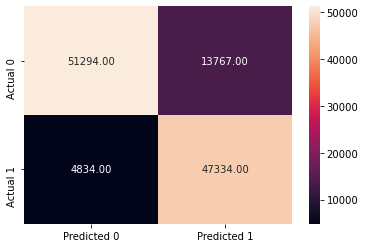

In [57]:
y_pred_gb=gb_model.predict(X1_test)
cm=confusion_matrix(y1_test,y_pred_gb)

sns.heatmap(cm,annot=True,xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],fmt='.2f')

In [58]:
classi_report=classification_report(y1_test,y_pred_gb)
print(classi_report)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     65061
           1       0.77      0.91      0.84     52168

    accuracy                           0.84    117229
   macro avg       0.84      0.85      0.84    117229
weighted avg       0.85      0.84      0.84    117229



In [60]:
print('F1Score for Gradient Boosting model:',f1_score(y1_test,y_pred_gb))

F1Score for Gradient Boosting model: 0.8357803105880691


## XG Boosting

In [61]:
xg_model=XGBClassifier(random_state=10)
xg_model=xg_model.fit(X1_train,y1_train)

[19:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

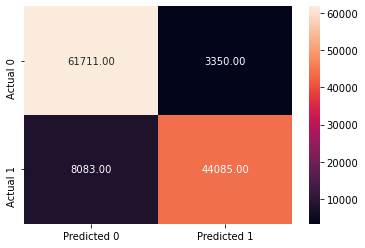

In [62]:
y_pred_xg=xg_model.predict(X1_test)
cm=confusion_matrix(y1_test,y_pred_xg)

sns.heatmap(cm,annot=True,xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],fmt='.2f')

In [63]:
classi_report=classification_report(y1_test,y_pred_xg)
print(classi_report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     65061
           1       0.93      0.85      0.89     52168

    accuracy                           0.90    117229
   macro avg       0.91      0.90      0.90    117229
weighted avg       0.90      0.90      0.90    117229



In [64]:
print('F1Score for XG Boosting model:',f1_score(y1_test,y_pred_xg))

F1Score for XG Boosting model: 0.8852143007740731


## Regularization

### Ridge

In [65]:
ridge= Ridge(random_state=10,alpha=0.01)
ridge_model=ridge.fit(X1_test,y1_test)

<AxesSubplot:>

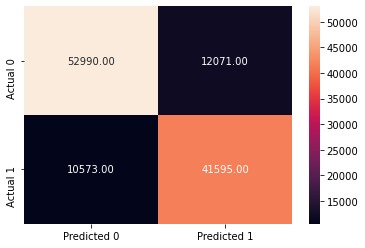

In [66]:
y_pred_prob=ridge_model.predict(X1_test)
y_pred_rid=[0 if x<0.6 else 1 for x in y_pred_prob]
cm=confusion_matrix(y1_test,y_pred_rid)

sns.heatmap(cm,annot=True,yticklabels=['Actual 0','Actual 1'],xticklabels=['Predicted 0','Predicted 1'],fmt='.2f')

In [67]:
classi_report=classification_report(y1_test,y_pred_rid)
print(classi_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     65061
           1       0.78      0.80      0.79     52168

    accuracy                           0.81    117229
   macro avg       0.80      0.81      0.80    117229
weighted avg       0.81      0.81      0.81    117229



In [68]:
print('F1Score for Ridge model:',f1_score(y1_test,y_pred_rid))

F1Score for Ridge model: 0.7860422926469756


### Lasso

In [69]:
lasso=Lasso(random_state=10,alpha=0.01)
lasso_model=lasso.fit(X1_test,y1_test)

<AxesSubplot:>

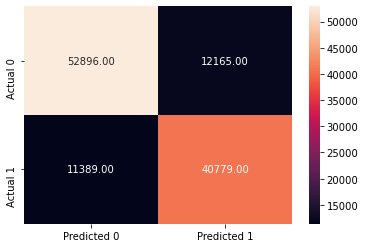

In [70]:
y_pred_prob=lasso_model.predict(X1_test)
y_pred_las=[0 if x<0.6 else 1 for x in y_pred_prob]
cm=confusion_matrix(y1_test,y_pred_las)

sns.heatmap(cm,annot=True,yticklabels=['Actual 0','Actual 1'],xticklabels=['Predicted 0','Predicted 1'],fmt='.2f')

In [71]:
classi_report=classification_report(y_pred_las,y1_test)
print(classi_report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     64285
           1       0.78      0.77      0.78     52944

    accuracy                           0.80    117229
   macro avg       0.80      0.80      0.80    117229
weighted avg       0.80      0.80      0.80    117229



In [72]:
print('F1Score for Lasso Model:',f1_score(y_pred_las,y1_test))

F1Score for Lasso Model: 0.7759152142476596


## Cross Validation

In [73]:
log_reg=LogisticRegression(random_state=10)
cv1=cross_val_score(estimator=log_reg,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv1=cv1.mean()
cv1

0.5813350859014188

In [74]:
rf=RandomForestClassifier(random_state=10)
cv2=cross_val_score(estimator=rf,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv2=cv2.mean()
cv2

0.8851980716807433

In [75]:
gdboost=GradientBoostingClassifier(random_state=10)
cv4=cross_val_score(estimator=gdboost,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv4=cv4.mean()
cv4

0.8613471165583265

In [76]:
xgboost=XGBClassifier()
cv5=cross_val_score(estimator=xgboost,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
cv5=cv5.mean()
cv5

[19:37:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.9014996389195907

## Fine tuning the models by using GridSearchCV

In [79]:
xg_model=XGBClassifier(n_estimators=400,max_depth=110,random_state=10)
xg_model=xg_model.fit(X1_train,y1_train)

[19:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

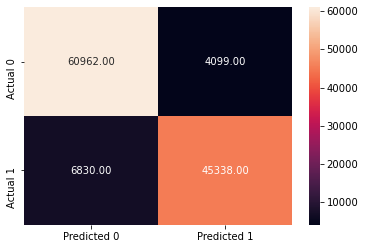

In [80]:
y_pred_x=xg_model.predict(X1_test)
#y_pred=[0 if x<0.6 else 1 for x in y_pred_prob]
cm=confusion_matrix(y1_test,y_pred_x)

sns.heatmap(cm,annot=True,yticklabels=['Actual 0','Actual 1'],xticklabels=['Predicted 0','Predicted 1'],fmt='.2f')

In [81]:
classi_report=classification_report(y1_test,y_pred_x)
print(classi_report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     65061
           1       0.92      0.87      0.89     52168

    accuracy                           0.91    117229
   macro avg       0.91      0.90      0.91    117229
weighted avg       0.91      0.91      0.91    117229



In [82]:
print('F1Score for XG Boosting tuned model:',f1_score(y_pred_x,y1_test))

F1Score for XG Boosting tuned model: 0.8924363958466611


## Feature Importances

Note: XG Boost model has highest F1Score. So, finding important features by using XG Boost model.

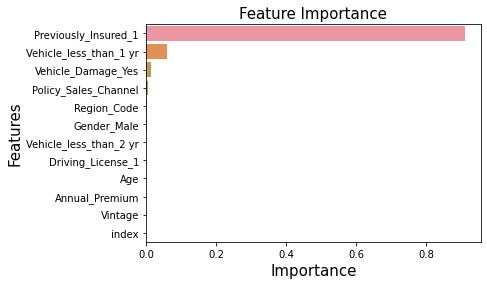

In [83]:
#finding important features
important_features = pd.DataFrame({'Features': X1_train.columns, 
                                   'Importance': xg_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

Inference: In the above plot, we could see that the feature Previously_Insured_1 is the most important feature.

## Summary of Models
**F1Score for Logistic Regression:** 0.4815031315240083

**F1Score for Logistic Regression with Optimal threshold value:** 0.4815031315240083

**F1Score for Random Forest:** 0.8718499593543143

**F1Score for Gradient Boost:** 0.8357803105880691

**F1Score for XG Boost:**  0.8852143007740731

**F1Score for Ridge:** 0.7860422926469756

**F1Score for Lasso:** 0.7759152142476596

**F1Score for XG Boost with Tuned Parameter:** 0.8924363958466611

### Inference: It seems  Xg boost model with tuned parameter is good. Because, this model has highest F1Score than all other models. So that, what we can conclude here is, we can suggest the company to build by using XG Boost with Parameter tuning to predict whether the customer is interested in buying Vehicle Insurance or not.